## Task: Restaurant Reviews
#### Analyze the text reviews to identify the most common positive and negative keywords.
#### Calculate the average length of reviews and explore if there is a relationship between review length and rating

 ### Importing the required libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the data set

In [2]:
df=pd.read_excel(r"C:\Users\Lenovo\Downloads\cleaned_data_cognifyz.xlsx")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,İstanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karaky,"Karaky, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,İstanbul,"Kouyolu Mahallesi, Muhittin stnda Caddesi, No ...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,İstanbul,"Kurueme Mahallesi, Muallim Naci Caddesi, No 56...",Kurueme,"Kurueme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,İstanbul,"Kurueme Mahallesi, Muallim Naci Caddesi, No 64...",Kurueme,"Kurueme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

### Counting Occurrences of Rating Text

In [4]:
rating_text_count = df['Rating text'].value_counts()
rating_text_count

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

### Visualizing the Rating Text Distribution

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11584\3495934316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_text_count.index, y=rating_text_count.values, palette='Set2')


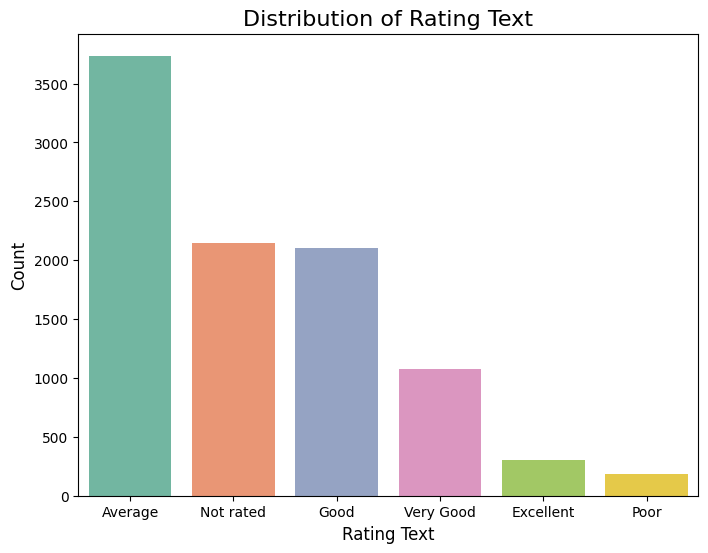

In [5]:
rating_text_count = df['Rating text'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=rating_text_count.index, y=rating_text_count.values, palette='Set2')
plt.title('Distribution of Rating Text', fontsize=16)
plt.xlabel('Rating Text', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()



### Identifying Positive and Negative Keywords

In [6]:
# Defining positive and negative ratings
positive_ratings = ['Excellent', 'Very Good', 'Good']
negative_ratings = ['Poor', 'Average', 'Not rated']

# Counting the positive and negative ratings
positivecount = rating_text_count[positive_ratings].sum()
negativecount = rating_text_count[negative_ratings].sum()

# Displaying the results
print(f"Total Positive Ratings: {positivecount}")
print(f"Total Negative Ratings: {negativecount}")


Total Positive Ratings: 3480
Total Negative Ratings: 6071


### Calculating the average length of reviews

In [7]:
df['Rating Text Length'] = df['Rating text'].apply(len)


###  Exploring the Relationship Between 'Rating text' Length and Rating

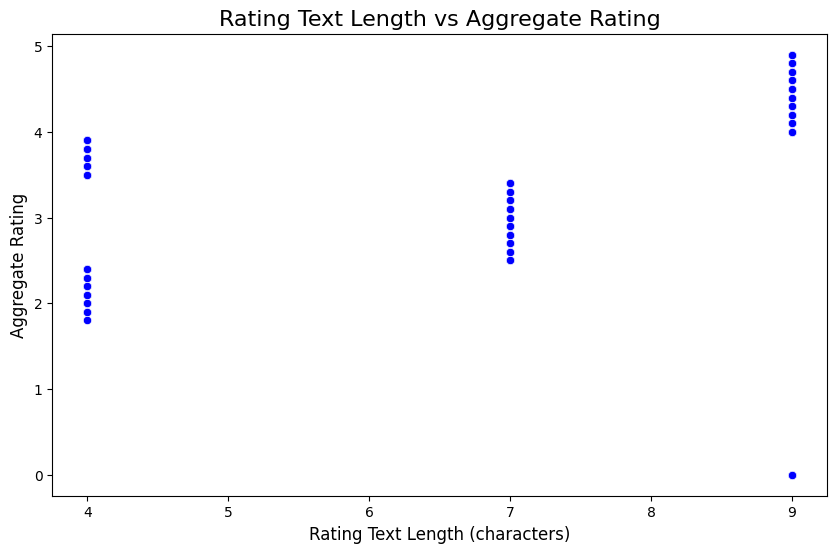

In [8]:
df['Rating Text Length'] = df['Rating text'].apply(len)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rating Text Length', y='Aggregate rating', color='blue')
plt.title('Rating Text Length vs Aggregate Rating', fontsize=16)
plt.xlabel('Rating Text Length (characters)', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=12)
plt.show()
